机器学习中：大部分情况下都是自有数据 或者是 网络上抓取的数据 这时候
就需要写一段程序对数据进行处理
 基本思路：
 1，获取数据，确定数据格式规范
 2，蚊子分词，英文分词可以按照空格分词 中文分词可以参考jieba
 3，建立词索引表，给每个词一个数字索引编号
 4，段落文字转为词索引向量
 5，段度文字转为词嵌入矩阵

In [1]:
import os
import tarfile
import urllib.request

import tensorflow as tf
import numpy as np
import re 
import string
from random import randint


In [2]:
#数据集地址
url="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz" #设置下载地址

filepath="F:/data/aclImdb_v1.tar.gz" #设置存储文件的路径


In [3]:
if not os.path.exists("F:/data"):
    os.makedirs("F:/data")

if not os.path.isfile(filepath):
    print('downloading...')
    result = urllib.request.urlretrieve(url,filepath)
    print('downloaded: ',result)
else:
    print(filepath,' is existed! ')
    

F:/data/aclImdb_v1.tar.gz  is existed! 


In [4]:
if not os.path.exists('F:/data/aclImdb'):
    tfile = tarfile.open(filepath,'r:gz')
    print('extracting...')
    result = tfile.extractall('F:/data/')
    print('extraction completed')
    
else:
    print('data/aclImdb is existed!')

data/aclImdb is existed!


In [5]:
#将文本中不需要的字符清除，如html标签
def remove_tags(text):
    re_tag = re.compile(r'<[^>]+>')
    return re_tag.sub('',text)

In [6]:
def read_files(filetype):
    path = 'f:/data/aclImdb/'
    file_list=[]
    
    #读取正面评价的文件的路径，存到file_list列表里
    positive_path = path +filetype+'/pos/'
    for f in os.listdir(positive_path):
        file_list += [positive_path+f]
    pos_files_num = len(file_list)
    
    #读取负面评价的文件的路径，存到file_list列表里
    negative_path = path+filetype+'/neg/'
    for f in os.listdir(negative_path):
        file_list+= [negative_path+f]
        neg_files_num = len(file_list)-pos_files_num
        
    print('read',filetype,'files:',len(file_list))
    print(pos_files_num,'pos files in ',filetype,'files')
    print(neg_files_num,'neg files in ',filetype,'files')
    
    #得到所有标签。标签用one-hot编码表示，正面评价标签为【1 0】负面为【0 1】
    all_labels = ([[1,0]]*pos_files_num + [[0,1]]*neg_files_num)
    
#     print('all_labels',all_labels)
    
    #得到所有文本。
    all_texts = []
    for fi in file_list:
        with open(fi,encoding='utf8') as file_input:
            #文本你中有<br /> 这类html标签，将文本传入remove_tag函数
            #函数里使用正则表达式 可以将这样的标签清除掉
            all_texts += [remove_tags(' '.join(file_input.readlines()))]
            
    return all_labels,all_texts

In [7]:
train_labels,train_texts=read_files("train")
test_labels,test_texts=read_files("test")                                     

read train files: 25000
12500 pos files in  train files
12500 neg files in  train files
read test files: 25000
12500 pos files in  test files
12500 neg files in  test files


In [8]:
#正面评价在前 负面评价 在后 按顺序排列在同一个列表中
# print(train_texts[2])
# print(train_labels[2])
print(train_texts[12499])
print(train_labels[12499])

Working-class romantic drama from director Martin Ritt is as unbelievable as they come, yet there are moments of pleasure due mostly to the charisma of stars Jane Fonda and Robert De Niro (both terrific). She's a widow who can't move on, he's illiterate and a closet-inventor--you can probably guess the rest. Adaptation of Pat Barker's novel "Union Street" (a better title!) is so laid-back it verges on bland, and the film's editing is a mess, but it's still pleasant; a rosy-hued blue-collar fantasy. There are no overtures to serious issues (even the illiteracy angle is just a plot-tool for the ensuing love story) and no real fireworks, though the characters are intentionally a bit colorless and the leads are toned down to an interesting degree. The finale is pure fluff--and cynics will find it difficult to swallow--though these two characters deserve a happy ending and the picture wouldn't really be satisfying any other way. *** from ****
[1, 0]


In [10]:
# import keras
from tensorflow import keras
#建立词汇字典
token = keras.preprocessing.text.Tokenizer(num_words=4000)
token.fit_on_texts(train_texts)

In [11]:
token.document_count

25000

In [31]:
#将单词（字符串）映射为他们的排名或者索引
# print(token.word_index)

In [30]:
#将单词（字符串）映射为他们在训练期间所出现的文档或文本数量
token.word_docs

defaultdict(int,
            {'all': 13069,
             'students': 276,
             'pettiness': 2,
             'far': 2551,
             'pity': 225,
             'student': 322,
             'some': 9644,
             'of': 23726,
             'life': 4576,
             "high's": 1,
             'cartoon': 367,
             'insightful': 63,
             'saw': 2756,
             'ran': 225,
             'sack': 42,
             'such': 4022,
             'schools': 56,
             'through': 3992,
             'at': 12936,
             'age': 966,
             'other': 6679,
             'immediately': 434,
             'that': 20039,
             'situation': 600,
             'right': 2772,
             'whole': 2641,
             'time': 8719,
             'can': 7851,
             'here': 4199,
             'many': 5067,
             'about': 10490,
             'high': 1837,
             'programs': 62,
             'pomp': 8,
             'much': 7084,
             'years

In [32]:
#查看token中词汇出现的频次排名
print(token.word_counts)

OrderedDict([('bromwell', 8), ('high', 2143), ('is', 107293), ('a', 163002), ('cartoon', 543), ('comedy', 3215), ('it', 79031), ('ran', 237), ('at', 23497), ('the', 336021), ('same', 4049), ('time', 12678), ('as', 46918), ('some', 15738), ('other', 9075), ('programs', 66), ('about', 17368), ('school', 1631), ('life', 6552), ('such', 5135), ('teachers', 75), ('my', 12473), ('35', 95), ('years', 4503), ('in', 93911), ('teaching', 82), ('profession', 65), ('lead', 1303), ('me', 10740), ('to', 135687), ('believe', 2504), ('that', 69775), ("high's", 1), ('satire', 260), ('much', 9757), ('closer', 206), ('reality', 977), ('than', 9915), ('scramble', 6), ('survive', 260), ('financially', 29), ('insightful', 65), ('students', 358), ('who', 20594), ('can', 11114), ('see', 11456), ('right', 3304), ('through', 4966), ('their', 11372), ('pathetic', 465), ("teachers'", 1), ('pomp', 9), ('pettiness', 2), ('of', 145833), ('whole', 3078), ('situation', 666), ('all', 23942), ('remind', 156), ('schools'

In [12]:
#文字转数字列表
#给每个词编个编号 便于作为输入序列
train_sequences = token.texts_to_sequences(train_texts)
test_sequences = token.texts_to_sequences(test_texts)

In [35]:
print(train_sequences[0])

[308, 6, 3, 1068, 208, 8, 2160, 29, 1, 168, 54, 13, 45, 81, 40, 391, 109, 137, 13, 57, 149, 7, 1, 481, 68, 5, 260, 11, 2000, 6, 72, 2422, 5, 631, 70, 6, 1, 5, 2001, 1, 1530, 33, 66, 63, 204, 139, 64, 1229, 1, 4, 1, 222, 899, 28, 3021, 68, 4, 1, 9, 693, 2, 64, 1530, 50, 9, 215, 1, 386, 7, 59, 3, 1470, 3710, 798, 5, 3509, 176, 1, 391, 9, 1235, 29, 308, 3, 352, 343, 2970, 142, 129, 5, 27, 4, 125, 1470, 2372, 5, 308, 9, 532, 11, 107, 1466, 4, 57, 554, 100, 11, 308, 6, 226, 47, 3, 2231, 11, 8, 214]


In [13]:
#填充序列
x_train = keras.preprocessing.sequence.pad_sequences(train_sequences,
                                                    padding='post',
                                                    truncating='post',
                                                    maxlen=400)

x_test = keras.preprocessing.sequence.pad_sequences(test_sequences,
                                                   padding='post',
                                                   truncating='post',
                                                   maxlen=400)

In [14]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)
# print(x_train[0])

In [15]:
model = keras.models.Sequential()

model.add(keras.layers.Embedding(output_dim=32,
                                input_dim=4000,
                                input_length=400))
model.add(keras.layers.Bidirectional(keras.layers.LSTM(units=8)))

model.add(keras.layers.Dense(units=32,activation='relu'))

model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Dense(units=2,activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 400, 32)           128000    
_________________________________________________________________
bidirectional (Bidirectional (None, 16)                2624      
_________________________________________________________________
dense (Dense)                (None, 32)                544       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 66        
Total params: 131,234
Trainable params: 131,234
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=["accuracy"])

In [18]:
history = model.fit(x_train,y_train,
                    validation_split=0.2,
                    epochs=10,
                    batch_size=128,
                    verbose=1)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 56s 3ms/sample - loss: 0.5912 - accuracy: 0.6878 - val_loss: 0.8240 - val_accuracy: 0.6298
Epoch 2/10
20000/20000 [==============================] - 63s 3ms/sample - loss: 0.3907 - accuracy: 0.8446 - val_loss: 0.6743 - val_accuracy: 0.6718
Epoch 3/10
20000/20000 [==============================] - 57s 3ms/sample - loss: 0.3446 - accuracy: 0.8650 - val_loss: 0.4384 - val_accuracy: 0.8200
Epoch 4/10
20000/20000 [==============================] - 50s 3ms/sample - loss: 0.2973 - accuracy: 0.8909 - val_loss: 0.7611 - val_accuracy: 0.6794
Epoch 5/10
20000/20000 [==============================] - 49s 2ms/sample - loss: 0.2601 - accuracy: 0.9066 - val_loss: 0.7451 - val_accuracy: 0.7178
Epoch 6/10
20000/20000 [==============================] - 53s 3ms/sample - loss: 0.2272 - accuracy: 0.9219 - val_loss: 0.5365 - val_accuracy: 0.8056
Epoch 7/10
20000/20000 [==============================] -

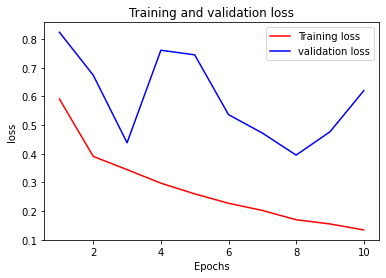

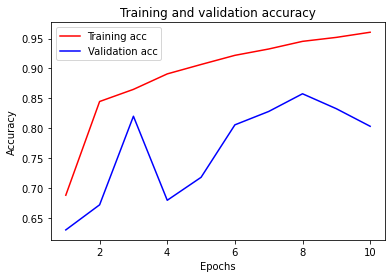

In [19]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(1,len(acc)+1)

plt.plot(epochs,loss,'r',label='Training loss')
plt.plot(epochs,val_loss,'b',label='validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


plt.clf()
acc_values = history.history['accuracy']
val_acc_values = history.history['val_accuracy']


plt.plot(epochs,acc,'r',label = 'Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




In [20]:
test_loss,test_acc = model.evaluate(x_test,y_test,verbose=1)
print('Test accuracy: ', test_acc)

25000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test accuracy:  0.84208


In [21]:
predictions = model.predict(x_test)
predictions[0]

array([0.9954294 , 0.00457057], dtype=float32)

In [28]:
sentiment_dict = {0:'pos',1:'neg'}

def display_test_sentiment(i):
    print(test_texts[i])
    print('label value:',sentiment_dict[np.argmax(y_test[i])],
         'predict value: ',sentiment_dict[np.argmax(predictions[i])])
    

In [52]:
display_test_sentiment(12500)

Once again Mr. Costner has dragged out a movie for far longer than necessary. Aside from the terrific sea rescue sequences, of which there are very few I just did not care about any of the characters. Most of us have ghosts in the closet, and Costner's character are realized early on, and then forgotten until much later, by which time I did not care. The character we should really care about is a very cocky, overconfident Ashton Kutcher. The problem is he comes off as kid who thinks he's better than anyone else around him and shows no signs of a cluttered closet. His only obstacle appears to be winning over Costner. Finally when we are well past the half way point of this stinker, Costner tells us all about Kutcher's ghosts. We are told why Kutcher is driven to be the best with no prior inkling or foreshadowing. No magic here, it was all I could do to keep from turning it off an hour in.
label value: neg predict value:  neg


In [23]:
review_text = 'Some rigid but still smooth, almost group out of the experience is more arresting.The biggest problem is that movies about sharks, sharks don\'t handle it as well as great whites do.'


In [35]:
review_text="Gee.How can a name pay 365 days?Is too plain.You have to call a sky-high petite wife: 365 days of the President's love. plot rotten to the jinjiang estimated that no one point to see, and it is also bad.But add a star for the man's body. I just went to see his body."

In [36]:
input_seq = token.texts_to_sequences([review_text])

In [37]:
pad_input_seq = keras.preprocessing.sequence.pad_sequences(input_seq,
                                                          padding='post',
                                                          truncating='post',
                                                          maxlen=400)

In [38]:
pred =model.predict(pad_input_seq)

In [39]:
print('predict value:',sentiment_dict[np.argmax(pred)])

predict value: neg


In [65]:
sentiment_dict = {0:'pos',1:'neg'}

def display_text_sentiment(text):
    print(text)
    input_seq = token.texts_to_sequences([text])
    pad_input_seq = keras.preprocessing.sequence.pad_sequences(input_seq,
                                                          padding='post',
                                                          truncating='post',
                                                          maxlen=400)
    
    pred =model.predict(pad_input_seq)
    print('predict value: ',sentiment_dict[np.argmax(pred)])
    

In [66]:
display_text_sentiment(review_text)

bad
predict value:  neg
